# Loads the Fashion-MNIST dataset.

This is a dataset of 60,000 28x28 grayscale images of 10 fashion categories, along with a test set of 10,000 images. This dataset can be used as a drop-in replacement for MNIST.

The classes are:

Label	Description
0	T-shirt/top
1	Trouser
2	Pullover
3	Dress
4	Coat
5	Sandal
6	Shirt
7	Sneaker
8	Bag
9	Ankle boot

In [88]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,MinMaxScaler,LabelEncoder
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,mean_squared_error
from keras.models import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout
from keras.optimizers import Adam,Adagrad

In [89]:
# Loading the dataset

from keras.datasets import fashion_mnist

In [90]:
(X_train, y_train), (X_test, y_test)=fashion_mnist.load_data()

In [91]:
label_classes = ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Sneaker','Bag','Ankle boot']


# Label	Description
# 0	T-shirt/top
# 1	Trouser
# 2	Pullover
# 3	Dress
# 4	Coat
# 5	Sandal
# 6	Shirt
# 7	Sneaker
# 8	Bag
# 9	Ankle boot

In [92]:
# Checking the shape of the dataset

(X_train.shape, y_train.shape), (X_test.shape, y_test.shape)

(((60000, 28, 28), (60000,)), ((10000, 28, 28), (10000,)))

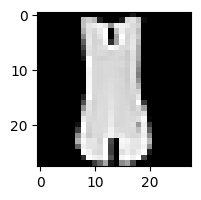

In [93]:
plt.figure(figsize=(2,2))

plt.imshow(X_train[4],cmap='gray')

In [94]:
# Label Encoding the labelled data using the to_categorical method

from keras.utils import to_categorical

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)




In [95]:
# Normalising the data
# np.max(X_train)

X_train= X_train/255
X_test= X_test/255

In [96]:
X_train.shape

(60000, 28, 28)

In [97]:
# Reshaping the data into a specific shape as CNN model always accepts data into a desired shape only

X_train = np.expand_dims(X_train,-1)
y_train = np.expand_dims(y_train,-1)

In [98]:
(X_train.shape, y_train.shape)

((60000, 28, 28, 1), (60000, 10, 1))

In [99]:
X_train.ndim

4

In [100]:
# Splitting the dataset
from sklearn.model_selection import train_test_split

X_train,X_val,y_train,y_val = train_test_split(X_train,y_train,test_size=0.2)

In [101]:
X_train.shape,X_val.shape,y_train.shape,y_val.shape

((48000, 28, 28, 1), (12000, 28, 28, 1), (48000, 10, 1), (12000, 10, 1))

# Building the CNN Model

In [102]:
model=keras.models.Sequential([
                              #Adding the first convulational layer
                              keras.layers.Conv2D(filters=32,kernel_size=3,strides=(1,1),padding='same' ,activation='relu',input_shape=[28,28,1]),
                              keras.layers.MaxPooling2D(pool_size=(2,2)),

                              #Adding the second convulational layer
                              keras.layers.Conv2D(filters=64,kernel_size=3,strides=(1,1),padding='same' ,activation='relu'),
                              keras.layers.MaxPooling2D(pool_size=(2,2)),
                              keras.layers.Flatten(),

                              #Adding the hidden layers
                              keras.layers.Dense(units=128,activation='relu'),
                              keras.layers.BatchNormalization(),
                              keras.layers.Dropout(rate=0.1),

                              #Adding another hidden layers
                              keras.layers.Dense(units=256,activation='relu'),
                              keras.layers.BatchNormalization(),
                              keras.layers.Dropout(rate=0.5),

                              #Adding the output layer
                              keras.layers.Dense(units=10,activation='softmax')

])

In [103]:
# Compiling the model.

optm= keras.optimizers.Adam(learning_rate=0.001)

model.compile(optimizer=optm,loss='categorical_crossentropy',metrics=['accuracy'])

#We can add data augumentation here only to overcome the risk of model overfitting

from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(rotation_range=0.11, width_shift_range=0.1,height_shift_range=0.1)
train_generator= datagen.flow(X_train,y_train)


In [104]:
# Training the model with the fit method.

model.fit(train_generator,batch_size=500,epochs=20,validation_data=(X_val,y_val))

Epoch 1/20
1500/1500 [==============================] - 24s 15ms/step - loss: 0.6709 - accuracy: 0.7590 - val_loss: 0.5052 - val_accuracy: 0.8115
Epoch 2/20
1500/1500 [==============================] - 21s 14ms/step - loss: 0.4537 - accuracy: 0.8329 - val_loss: 0.3706 - val_accuracy: 0.8691
Epoch 3/20
1500/1500 [==============================] - 20s 13ms/step - loss: 0.4040 - accuracy: 0.8525 - val_loss: 0.3187 - val_accuracy: 0.8838
Epoch 4/20
1500/1500 [==============================] - 21s 14ms/step - loss: 0.3778 - accuracy: 0.8623 - val_loss: 0.2905 - val_accuracy: 0.8896
Epoch 5/20
1500/1500 [==============================] - 20s 13ms/step - loss: 0.3545 - accuracy: 0.8702 - val_loss: 0.2636 - val_accuracy: 0.9021
Epoch 6/20
1500/1500 [==============================] - 21s 14ms/step - loss: 0.3447 - accuracy: 0.8738 - val_loss: 0.2752 - val_accuracy: 0.8951
Epoch 7/20
1500/1500 [==============================] - 21s 14ms/step - loss: 0.3284 - accuracy: 0.8786 - val_loss: 0.2682 -

# Testing the model now

In [105]:
label_classes = ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Sneaker','Bag','Ankle boot']


# Label	Description
# 0	T-shirt/top
# 1	Trouser
# 2	Pullover
# 3	Dress
# 4	Coat
# 5	Sandal
# 6	Shirt
# 7	Sneaker
# 8	Bag
# 9	Ankle boot

In [116]:
# model.predict(X_test.round(),y_test)

In [117]:
X_test.shape,y_test.shape

((10000, 28, 28), (10000, 10))

In [118]:
# Prediction by model based on test dataset is ankle boot

np.argmax(model.predict(np.expand_dims(X_test[0],axis=0)).round())

1/1 [==============================] - 0s 96ms/step


9

In [119]:
# Reality of the dataset which is true value

np.argmax(y_test[0])

9

In [120]:
# Again checking Prediction by model based on test dataset is shirt

np.argmax(model.predict(np.expand_dims(X_test[101],axis=0)).round())

1/1 [==============================] - 0s 30ms/step


6

In [121]:
# Reality of the dataset which is true value

np.argmax(y_test[101])

6

In [122]:
y_pred= model.predict(X_test).round()
y_pred

313/313 [==============================] - 1s 4ms/step


array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [123]:
y_test_labels = [np.argmax(y) for y in y_test]

y_pred_labels = [np.argmax(x) for x in y_pred]

In [127]:
# Checking the accuracy of the model from Confusion Matrix

from sklearn.metrics import confusion_matrix

cm =confusion_matrix(y_test_labels,y_pred_labels)
cm

array([[860,   1,  10,   8,   1,   0, 110,   0,  10,   0],
       [  5, 988,   0,   5,   1,   0,   0,   0,   1,   0],
       [ 44,   1, 809,   3,  64,   0,  78,   0,   1,   0],
       [ 52,  10,   5, 875,  26,   0,  29,   0,   3,   0],
       [ 25,   1,  48,  12, 869,   0,  45,   0,   0,   0],
       [  1,   0,   0,   0,   0, 988,   0,  10,   0,   1],
       [125,   1,  26,   9,  70,   0, 761,   0,   8,   0],
       [  0,   0,   0,   0,   0,  13,   0, 978,   0,   9],
       [  5,   0,   0,   0,   0,   1,   1,   0, 993,   0],
       [  1,   0,   0,   0,   0,  10,   0,  36,   0, 953]])

<Axes: >

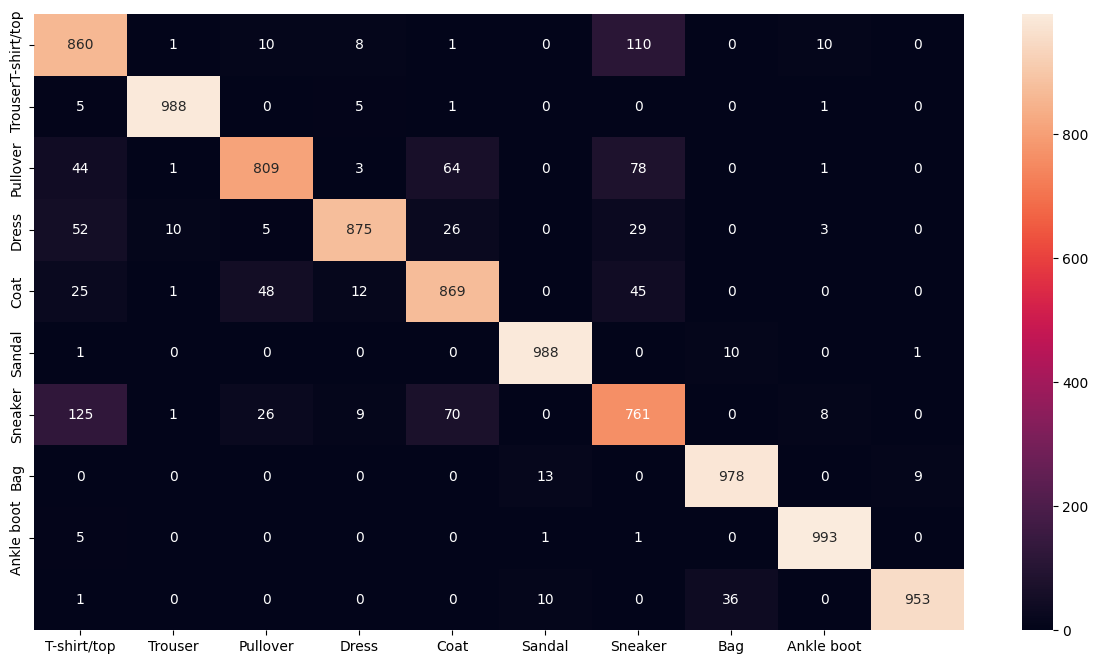

In [136]:
#Plotting the confusion matrix heatmap

plt.figure(figsize=(15,8))
sns.heatmap(cm,annot=True,fmt='d',xticklabels=label_classes,yticklabels=label_classes)

In [137]:
#Checking the full report of the data

# Label	Description
# 0	T-shirt/top
# 1	Trouser
# 2	Pullover
# 3	Dress
# 4	Coat
# 5	Sandal
# 6	Shirt
# 7	Sneaker
# 8	Bag
# 9	Ankle boot

print(classification_report(y_test_labels,y_pred_labels))

              precision    recall  f1-score   support

           0       0.77      0.86      0.81      1000
           1       0.99      0.99      0.99      1000
           2       0.90      0.81      0.85      1000
           3       0.96      0.88      0.92      1000
           4       0.84      0.87      0.86      1000
           5       0.98      0.99      0.98      1000
           6       0.74      0.76      0.75      1000
           7       0.96      0.98      0.97      1000
           8       0.98      0.99      0.99      1000
           9       0.99      0.95      0.97      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



In [140]:
# Saving the model

model.save('/content/MNIST_2023.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [141]:
# Deploying the model with name model_deploy


model_deploy = keras.models.load_model('/content/MNIST_2023.h5')

In [151]:
#Checking if the model deploy is working correctly

np.argmax(model_deploy.predict(np.expand_dims(X_test[11],axis=0)).round())

1/1 [==============================] - 0s 31ms/step


5

In [153]:
np.argmax(y_test[11])

5